# k-Nearest Neighbors (kNN)
1. For prediction, identify k records in the training data that are "similar" to a new record in the testing data
    1. These similar records are called neighbors
2. Use these similar records to classify the new record into a class
    1. The class label of the new record is the predominant class among the class label of the neighbors
3. kNN can be used for regression problems too

## KNN In Picture
1. Classify individuals as home owners or not

![alt text](knn.png "Title")

## Import Required Packages

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

## Import Data

In [2]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Preprocessing
1. The "ID" and "ZIP Code" columns are not relevant for model building and therefore should be removed.
2. If a column name has a space, replace the space with an underscore (_)
3. Change the "Education" variable to be type "category". Rename the values (1,2,3) of Education variable to the following:
    1. 1 = "Undergrad"
    2. 2 = "Graduate"
    3. 3 = "Advanced/Professional"
4. Turn the renamed variable to be a dummy variable

In [3]:
# Delete the ID and ZIP code columns
bank_dfv2 = bank_df.drop(columns=['ID', 'ZIP Code'])

# Replace space with underscore in column names
bank_dfv2.columns = bank_dfv2.columns.str.replace(' ', '_')

# Change "Education" column as categorical
bank_dfv2['Education'] = bank_dfv2['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Advanced/ Professional"
new_categories = {1:'Undergrad', 2:'Graduate', 3:'Advanced/Professional'}
bank_dfv2.Education.cat.rename_categories(new_categories, inplace=True)

# Create dummy variables for the categorical data
bank_dfv3 = pd.get_dummies(bank_dfv2, prefix_sep='_', drop_first=True)

## Data Preprocessing
1. Identify dependent and independent variables
2. Standardize the data to negate effect of variable scale (income vs height)
4. Split data into training and testing data
    1. 60% training and 40% testing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify dependent and independent variables
y = bank_dfv3['Personal_Loan']
X = bank_dfv3.drop(columns=['Personal_Loan'])

#Standardize independent variables in ALL data (zero mean and unit variance)
std_X = StandardScaler().fit_transform(X)
std_X_df = pd.DataFrame(std_X, columns=X.columns)

# Partition data into training (60%) and testing (40%)
train_X, test_X, train_y, test_y = train_test_split(std_X_df, y, test_size=0.4, random_state=1)

## Modeling "Personal Loans"
1. Fit the kNN model on the training data
    1. The choice of "k" is crucial
    2. KNN is a non-parametric model
2. Fit the discriminant analysis model on the training data
3. Fit the logistic regression model on the training data

LogisticRegression(C=1e+42, solver='liblinear')

## Modeling "Personal Loans"
1. For each model get
    1. Class prediction label of the training
    2. Probabilities of belonging to the class of the training and testing data

Class predictions for training data


,Actual_Class,kNN_Prediction,DA_Prediction,Logistic_Prediction
4522,0,0,0,0
2851,0,0,0,0
2313,0,0,0,0
982,0,0,0,0
1164,1,1,1,1


## Modeling "Personal Loans"
1. For each model get
    1. Probabilities of belonging to the class of the training

In [17]:
# kNN class label for training and testing data
knn_prob_train = knn.predict_proba(train_X)
knn_prob_test = knn.predict_proba(test_X)

# discriminant analysis class label for training and testing data
da_prob_train = da.predict_proba(train_X)
da_prob_test = da.predict_proba(test_X)

# discriminant analysis class label for training and testing data
log_prob_train = log.predict_proba(train_X)
log_prob_test = log.predict_proba(test_X)

# Summary of training data predictions
pred_summary = pd.DataFrame({"kNN_Probability_P(Y=0)": knn_prob_train[:,0],\
                             "DA_Probability_P(Y=0)":da_prob_train[:,0],\
                             "Logistic_Probability_P(Y=0)":log_prob_train[:,0]})

print("Class predictions for training data")
pred_summary.head()

Class predictions for training data


,kNN_Probability_P(Y=0),DA_Probability_P(Y=0),Logistic_Probability_P(Y=0)
0,1.0,0.999982,0.999985
1,1.0,0.979038,0.943801
2,1.0,0.998897,0.996905
3,1.0,0.997964,0.994108
4,0.0,0.037132,0.198476


## Model Evaluation
1. Provide the model's accuracy rate and comment on it
2. Provide the model's misclassification rate and comment on it

In [19]:
from sklearn.metrics import accuracy_score

# Accuracy rate for knn, LDA and logistic
knn_test_accuracy = accuracy_score(test_y, knn_pred_test)
da_test_accuracy = accuracy_score(test_y, da_pred_test)
log_test_accuracy = accuracy_score(test_y, log_pred_test)

# Get misclassification rate
knn_test_misclass = round(1 - knn_test_accuracy, 4)
da_test_misclass = round(1 - da_test_accuracy, 4)
log_test_misclass = round(1 - log_test_accuracy, 4)

print("Accuracy rate for knn:", knn_test_accuracy)
print("Accuracy rate for linear discriminant analysis:", da_test_accuracy)
print("Accuracy rate for logistic regression:", log_test_accuracy)

print("\nMisclassification rate for kNN:", knn_test_misclass)
print("Misclassification rate for linear discriminant analysis:", da_test_misclass)
print("Misclassification rate for logistic regression:", log_test_misclass)

Accuracy rate for knn: 0.952
Accuracy rate for linear discriminant analysis: 0.944
Accuracy rate for logistic regression: 0.96

Misclassification rate for kNN: 0.048
Misclassification rate for linear discriminant analysis: 0.056
Misclassification rate for logistic regression: 0.04


## Model Evaluation
1. Provide the ROC curve and comment on it

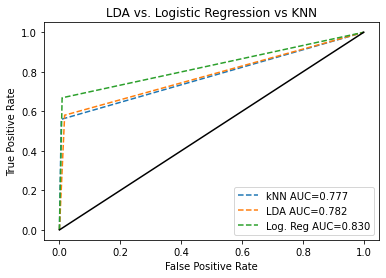

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate AUC for test data
knn_auc_test = roc_auc_score(test_y, knn_pred_test)
da_auc_test = roc_auc_score(test_y, da_pred_test)
log_auc_test = roc_auc_score(test_y, log_pred_test)

# calculate fpr and tpr for logistic regression and linear discriminant analysis
knn_fpr_test, knn_tpr_test, _ = roc_curve(test_y, knn_pred_test)
da_fpr_test, da_tpr_test, _ = roc_curve(test_y, da_pred_test)
log_fpr_test, log_tpr_test, _ = roc_curve(test_y, log_pred_test)

# Plotting
plt.plot(knn_fpr_test, knn_tpr_test, linestyle='--', label="{}{:.3f}".format("kNN AUC=", knn_auc_test))
plt.plot(da_fpr_test, da_tpr_test, linestyle='--', label="{}{:.3f}".format("LDA AUC=", da_auc_test))
plt.plot(log_fpr_test, log_tpr_test, linestyle='--', label="{}{:.3f}".format("Log. Reg AUC=", log_auc_test))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("LDA vs. Logistic Regression vs KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()